# Importing Data & Libraries

In [36]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

club_games_df = pd.read_csv("C:/Users/Louis/Desktop/3°Anno/IUM/Progetto/FootballData/club_games.csv")

# Data Preparation

In [37]:
club_games_df.shape

(130432, 11)

In [38]:
club_games_df.tail(10)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
130422,4094659,667,1,14.0,Patrick Vieira,273,1,9.0,Bruno Génésio,Away,0
130423,4095969,39,1,16.0,Bo Svensson,89,4,3.0,Urs Fischer,Away,0
130424,4098048,383,3,1.0,Peter Bosz,317,0,4.0,Joseph Oosting,Away,1
130425,4120903,370,0,11.0,Barry Robson,2553,2,4.0,Derek McInnes,Away,0
130426,4126817,126,3,11.0,İlhan Palut,449,2,13.0,Nenad Bjelica,Away,1
130427,4126931,20923,2,NaN,Sergey Perednya,12065,1,NaN,Aleksandr Gorbachev,Away,1
130428,4148237,920,0,NaN,Ruaidhri Higgins,10481,1,NaN,Milic Curcic,Away,0
130429,4171268,681,2,NaN,Imanol Alguacil,409,0,NaN,Gerhard Struber,Away,1
130430,4148252,144,3,NaN,Sergej Jakirovic,10532,1,NaN,Dan Brimsvík,Away,1
130431,4171248,418,3,NaN,Carlo Ancelotti,6195,2,NaN,Rudi Garcia,Away,1


In [39]:
club_games_df = club_games_df.set_index('game_id')
club_games_df.head(10)

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
2222664,932,1,5.0,Slaven Bilic,2698,0,8.0,Kurban Berdyev,Home,1
2222683,2696,0,11.0,Andrey Kobelev,12438,1,16.0,Gadzhi Gadzhiev,Home,0
2222685,2698,0,7.0,Kurban Berdyev,232,1,5.0,Valeriy Karpin,Home,0
2222709,3725,2,5.0,Stanislav Cherchesov,11126,1,16.0,Fedor Shcherbachenko,Home,1


In [40]:
# renaming columns
club_games_df = club_games_df.rename(columns= {
    'own_goals' : 'club_goals',
    'own_position' : 'club_position',
    'own_manager_name':'club_manager_name'
})

club_games_df

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
...,...,...,...,...,...,...,...,...,...,...
4126931,20923,2,NaN,Sergey Perednya,12065,1,NaN,Aleksandr Gorbachev,Away,1
4148237,920,0,NaN,Ruaidhri Higgins,10481,1,NaN,Milic Curcic,Away,0
4171268,681,2,NaN,Imanol Alguacil,409,0,NaN,Gerhard Struber,Away,1


In [41]:
club_games_df.isna().sum()

# probabilmente le righe con position NaN sono quelle che descrivono le prime partite delle due squadre, dove quindi non hanno una posizione in classifica ancora

club_id                      0
club_goals                   0
club_position            38908
club_manager_name         1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64

In [42]:
# setting NA position values to 0

club_games_df.loc[club_games_df['club_position'].isna(), 'club_position'] = 0

club_games_df.loc[club_games_df['opponent_position'].isna(), 'opponent_position'] = 0

club_games_df.isna().sum()

club_id                     0
club_goals                  0
club_position               0
club_manager_name        1484
opponent_id                 0
opponent_goals              0
opponent_position           0
opponent_manager_name    1484
hosting                     0
is_win                      0
dtype: int64

In [43]:
# club_games_df.query('club_id == 418 and opponent_id == 13')

club_games_df.loc[club_games_df.duplicated()]

# ci sono duplicati perchè è possibile che due squadre giochino più volte una contro l'altra e con lo stesso risultato

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
3038747,418,3,0.0,Zinédine Zidane,31,1,0.0,Jürgen Klopp,Home,1
4173721,44914,1,0.0,Ricky Waddell,23616,2,0.0,Mark Cowie,Home,0
2495367,27,3,0.0,Pep Guardiola,2410,0,0.0,Leonid Slutski,Home,1
2486736,512,1,10.0,Mark Hughes,3008,0,15.0,Steve Bruce,Home,1
2849034,660,1,1.0,Paulo Fonseca,23611,1,4.0,Roman Sanzhar,Home,0
2847145,2578,1,4.0,Tommy Wright,43,0,5.0,Ian Cathro,Home,1
3376110,28097,2,0.0,Andrey Zakharov,12065,3,0.0,Aleksandr Akimov,Home,0
3651120,31,2,0.0,Jürgen Klopp,720,0,0.0,Sérgio Conceição,Home,1
2846713,23611,1,4.0,Roman Sanzhar,6992,0,6.0,Oleksandr Babych,Home,1


In [44]:
club_games_df.dtypes

club_id                    int64
club_goals                 int64
club_position            float64
club_manager_name         object
opponent_id                int64
opponent_goals             int64
opponent_position        float64
opponent_manager_name     object
hosting                   object
is_win                     int64
dtype: object

In [45]:
club_games_df['is_win'] = club_games_df['is_win'].replace({1: True, 0: False})

club_games_df['is_win'] = club_games_df['is_win'].astype(bool)

club_games_df

# si potrebbe cambiare hosting anche in is_hosting e cambiare Home con True e Away con False, per intendere che il club sta ospitando la partita sì/no

C:\Users\Louis\AppData\Local\Temp\ipykernel_10428\3206885726.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  club_games_df['is_win'] = club_games_df['is_win'].replace({1: True, 0: False})


,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,0.0,Lutz Göttling,60,2,0.0,Christian Streich,Home,False
2221755,83,3,0.0,Ralph Hasenhüttl,4795,0,0.0,Tomas Oral,Home,True
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,True
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,False
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,False
...,...,...,...,...,...,...,...,...,...,...
4126931,20923,2,0.0,Sergey Perednya,12065,1,0.0,Aleksandr Gorbachev,Away,True
4148237,920,0,0.0,Ruaidhri Higgins,10481,1,0.0,Milic Curcic,Away,False
4171268,681,2,0.0,Imanol Alguacil,409,0,0.0,Gerhard Struber,Away,True


# Data Analysis & Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

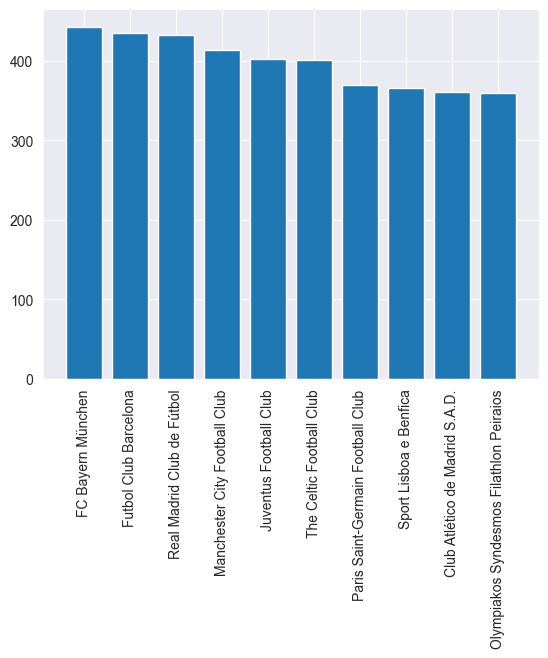

In [46]:
club_wins = club_games_df[club_games_df['is_win'] == True]['club_id'].value_counts().head(10)

clubs_df = pd.read_csv("C:/Users/Louis/Desktop/3°Anno/IUM/Progetto/FootballData/clubs.csv")

club_name_wins = pd.merge(club_wins, clubs_df, left_index=True, right_on='club_id')


plt.bar(club_name_wins['name'], club_name_wins['count'])
plt.xticks(rotation=90)
plt.show

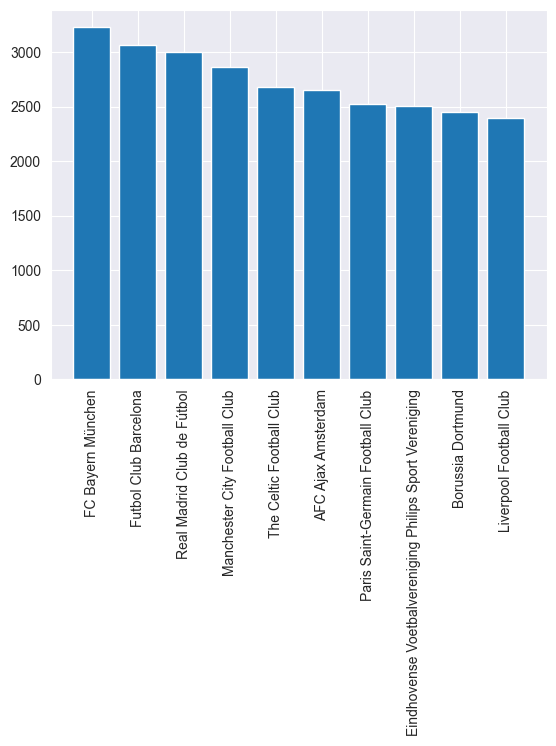

In [62]:
club_goals = pd.DataFrame()

club_goals['goals'] = club_games_df.groupby('club_id')['club_goals'].sum() + club_games_df.groupby('opponent_id')['opponent_goals'].sum()

club_goals = club_goals.sort_values(ascending=False, by='goals').head(10)

top10_goals = pd.merge(club_goals, clubs_df, left_index=True, right_on='club_id')

plt.bar(top10_goals['name'], top10_goals['goals'])
plt.xticks(rotation=90) 
plt.show()
